<a href="https://colab.research.google.com/github/dcabarcase/Proyecto-de-Vision/blob/main/AvanceProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install img2pdf

In [184]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request
import numpy as np
from PIL import Image 
import urllib.request
import img2pdf
import tempfile

In [ ]:
#@title
#Filtros 
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [186]:
IMAGE_URL = 'https://github.com/dcabarcase/Proyecto-de-Vision/blob/main/avcc.jpeg?raw=true'
im = io.imread(IMAGE_URL) 
def filtrado_inicial(im):
    imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) #Poner la imagen en escala de grises
    imfil = cv2.GaussianBlur(imgray, (5,5), 0) #filtro Gaussiano para suavizar la imagen y reducir el ruido
    cv2_imshow(imfil) 
    return imfil

In [187]:
def rotacion(imfil):
    imrot = cv2.rotate(imfil,cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2_imshow(imrot)   

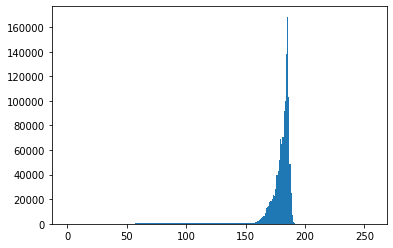

El valor máximo del histograma es: 185


In [188]:
def calcular_histograma(imfil):
    hist = plt.hist(imfil.ravel(), bins=256, range=[0,256])
    plt.show(hist)
    frecuencias = hist[0]
    bins = hist[1]
    valor_max = np.argmax(frecuencias)
    print("El valor máximo del histograma es:", valor_max)
calcular_histograma(imfil)  

In [199]:
def procesado_imagen():
    #(T, threshImg) = cv2.threshold(imfil, 155, 255, cv2.THRESH_BINARY) Manual
    #(T, threshImg) = cv2.threshold(imfil, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU) #Metodo de OTSU
    imumbral = cv2.adaptiveThreshold(imfil, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #Metodo Gaussiano
    #imumbral = threshImg.copy()
    kernel = np.ones((1,1),np.uint8)
    erosion = cv2.erode(imumbral,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 2)   
    return dilation

In [200]:
def conver_pdf():
    #Impresión de PDF para la imagen escaneada
    dilation = procesado_imagen()
    imagen_pil = Image.fromarray(dilation)  # Convertir a formato PIL
    # Guardar la imagen en un archivo temporal en formato .jpg
    scan_jpg = 'resultado.jpg'
    imagen_pil.save(scan_jpg, 'JPEG')
    # Convertir la imagen a formato pdf y guardarla en un archivo
    with open('Scaner.pdf', 'wb') as f:
        f.write(img2pdf.convert([scan_jpg], dpi=300))
conver_pdf()        